In [1]:
import matplotlib.pyplot as plt
from itertools import product
from collections import defaultdict

from pyqcs import CZ, GenericGate, State, H
from pyqcs.graph.util import C_L

In [2]:
%matplotlib inline

In [3]:
plus_state_state_2 = (H(0) | H(1)) * State.new_zero_state(2)
plus_state_state_2

(0.5000000000000001+0j)*|0b0> + (0.5000000000000001+0j)*|0b1> + (0.5000000000000001+0j)*|0b10> + (0.5000000000000001+0j)*|0b11>

In [4]:
plus_state_state_2_cz = CZ(0, 1) * plus_state_state_2
plus_state_state_2_cz

(0.5000000000000001+0j)*|0b0> + (0.5000000000000001+0j)*|0b1> + (0.5000000000000001+0j)*|0b10> + (-0.5000000000000001-0j)*|0b11>

In [5]:
circuits = [GenericGate(0, C_L[c0]) | GenericGate(1, C_L[c1]) for c0,c1 in product(range(24), range(24))]

In [6]:
resulting_states = [c * s for c,s in product(circuits, (plus_state_state_2, plus_state_state_2_cz))]

In [7]:
def get_equivalent_states(s, resulting_states):
    for i,test in enumerate(resulting_states):
        if(test == s):
            yield i
            
equivalent_states = [list(get_equivalent_states(s, resulting_states)) for s in resulting_states]

In [8]:
equivalent_state_counts = [len(e) - 1 for e in equivalent_states]

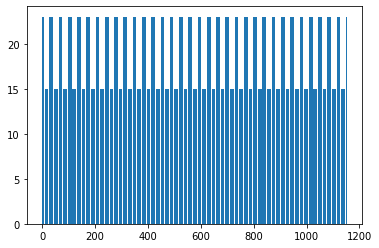

In [9]:
plt.bar(range(len(resulting_states)), equivalent_state_counts)
plt.show()

In [10]:
clusters = set((tuple(sorted(v)) for v in equivalent_states))

In [11]:
set(equivalent_state_counts)

{15, 23}

In [12]:
len(equivalent_states)

1152

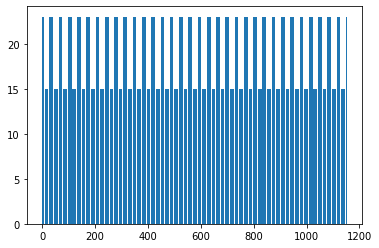

In [13]:
resulting_states_after_cz = [CZ(0, 1) * s for s in resulting_states]
equivalent_states_after_cz = [list(get_equivalent_states(s, resulting_states_after_cz)) for s in resulting_states_after_cz]
equivalent_state_counts_after_cz = [len(e) - 1 for e in equivalent_states_after_cz]

plt.bar(range(len(resulting_states)), equivalent_state_counts_after_cz)
plt.show()

In [14]:
clusters_after_cz = set((tuple(sorted(v)) for v in equivalent_states))
set(equivalent_state_counts_after_cz)

{15, 23}

In [15]:
clusters == clusters_after_cz

True

In [16]:
resulting_states_after_cz_C_L = [c*s for c,s in product(circuits, resulting_states)]

In [ ]:
equivalent_states_after_cz_C_L = [list(get_equivalent_states(s, resulting_states_after_cz_C_L)) for s in resulting_states_after_cz_C_L]
equivalent_state_counts_after_cz_C_L = [len(e) - 1 for e in equivalent_states_after_cz_C_L]

plt.bar(range(len(resulting_states_after_cz_C_L)), equivalent_state_counts_after_cz_C_L)
plt.show()